<a href="https://colab.research.google.com/github/AnLe08/Project-ML/blob/main/League_of_Legends_Match_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#League of Legends Match Predictor


### Introduction

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.

### Step 1: Data Loading and Preprocessing



### Setup
Installing required libraries:



In [2]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [26]:
## Write your code here
df = pd.read_csv('/content/league_of_legends_data_large.csv')
df.head()

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [27]:
X = df.drop('win', axis=1)
y = df['win']


In [28]:
# train-test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)
display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

'X_train shape: (800, 8)'

'y_train shape: (800,)'

'X_test shape: (200, 8)'

'y_test shape: (200,)'

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# 1. Load the dataset
data = pd.read_csv('league_of_legends_data_large.csv')  # Replace with your actual file path or name

# 2. Split into features and target
X = data.drop('win', axis=1)
y = data['win']

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


### Step 2: Logistic Regression Model




In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Define the Logistic Regression Model
class logistic_reg(nn.Module):
    def __init__(self, input_dim):
        super(logistic_reg, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer with 1 output

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation

# Assuming X_train is already defined and is a tensor
# Step 2: Initialize the Model, Loss Function, and Optimizer
input_dim = X_train.shape[1]  # Number of features

model = logistic_reg(input_dim)  # Create the model instance

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer with learning rate 0.01


### Step 3: Model Training

#### Task 3: Train the logistic regression model on the dataset.


In [31]:
# Set number of epochs
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()  # Set to training mode
    optimizer.zero_grad()  # Clear previous gradients

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()  # Set to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    # Predictions on training and test sets
    train_preds = model(X_train)
    test_preds = model(X_test)

    # Apply threshold of 0.5
    train_preds_class = (train_preds >= 0.5).float()
    test_preds_class = (test_preds >= 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_preds_class == y_train).float().mean()
    test_accuracy = (test_preds_class == y_test).float().mean()

    print(f'Training Accuracy: {train_accuracy.item():.4f}')
    print(f'Test Accuracy: {test_accuracy.item():.4f}')


Epoch [100/1000], Loss: 0.7211
Epoch [200/1000], Loss: 0.7074
Epoch [300/1000], Loss: 0.6988
Epoch [400/1000], Loss: 0.6934
Epoch [500/1000], Loss: 0.6902
Epoch [600/1000], Loss: 0.6883
Epoch [700/1000], Loss: 0.6871
Epoch [800/1000], Loss: 0.6863
Epoch [900/1000], Loss: 0.6859
Epoch [1000/1000], Loss: 0.6857
Training Accuracy: 0.5375
Test Accuracy: 0.4950


### Step 4: Model Optimization and Evaluation

#### Task 4: Implement optimization techniques and evaluate the model's performance.

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.




In [32]:
## Write your code here
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    train_preds = model(X_train)
    test_preds = model(X_test)

    train_preds_class = (train_preds >= 0.5).float()
    test_preds_class = (test_preds >= 0.5).float()

    train_accuracy = (train_preds_class == y_train).float().mean()
    test_accuracy = (test_preds_class == y_test).float().mean()

    print(f"Training Accuracy: {train_accuracy.item():.4f}")
    print(f"Test Accuracy: {test_accuracy.item():.4f}")


Epoch [100/1000], Loss: 0.6855
Epoch [200/1000], Loss: 0.6854
Epoch [300/1000], Loss: 0.6853
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Training Accuracy: 0.5450
Test Accuracy: 0.5050


### Step 5: Visualization and Interpretation

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error.

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC:
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.


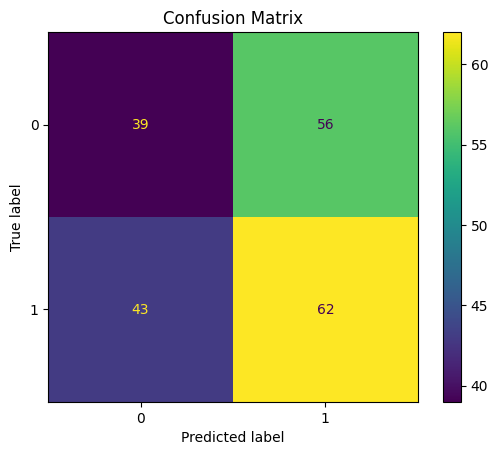

Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.41      0.44        95
         1.0       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



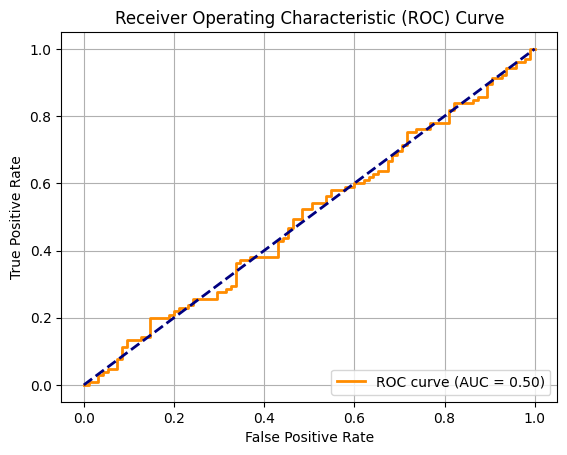

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
model.eval()
with torch.no_grad():
    probs = model(X_test).numpy()
    preds = (probs >= 0.5).astype(int)  # for confusion matrix and report
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test.numpy(), preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test.numpy(), preds))
fpr, tpr, thresholds = roc_curve(y_test.numpy(), probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Step 6: Model Saving and Loading

#### Task 6: Save and load the trained model.

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.



In [34]:

# Save only the model's state dictionary (weights and biases)
torch.save(model.state_dict(), 'logistic_model.pth')
# Recreate the model instance
input_size = X_test.shape[1]
model_loaded = logistic_reg(input_size)  # Use your model class name

# Load the state dict
model_loaded.load_state_dict(torch.load('logistic_model.pth'))

# Switch to evaluation mode
model_loaded.eval()
# Ensure no gradient tracking during inference
with torch.no_grad():
    test_probs = model_loaded(X_test)
    test_preds = (test_probs >= 0.5).int()

    # Evaluate accuracy (for example)
    acc = (test_preds == y_test).sum().item() / len(y_test)
    print(f"Test Accuracy of Loaded Model: {acc:.4f}")





Test Accuracy of Loaded Model: 0.5050


### Step 7: Hyperparameter Tuning

#### Task 7: Perform hyperparameter tuning to find the best learning rate.

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .

In [35]:
## Write your code here
learning_rates = [0.01, 0.05, 0.1]
input_size = X_train.shape[1]
num_epochs = 50
best_acc = 0
best_lr = None

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")

    # 1. Reinitialize the model and optimizer
    model = logistic_reg(input_size)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.BCELoss()

    # 2. Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # 3. Evaluate
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        predicted_labels = (predictions >= 0.5).int()
        accuracy = (predicted_labels == y_test).float().mean().item()
        print(f"Accuracy at lr={lr}: {accuracy:.4f}")

    # 4. Track best
    if accuracy > best_acc:
        best_acc = accuracy
        best_lr = lr

print(f"\n Best learning rate: {best_lr} with accuracy: {best_acc:.4f}")



Testing learning rate: 0.01
Accuracy at lr=0.01: 0.4850
Testing learning rate: 0.05
Accuracy at lr=0.05: 0.4500
Testing learning rate: 0.1
Accuracy at lr=0.1: 0.5300

 Best learning rate: 0.1 with accuracy: 0.5300


### Step 8: Feature Importance

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.

The code to evaluate feature importance to understand the impact of each feature on the prediction.


In [38]:
print(f"Số lượng đặc trưng (features): {len(X_train.columns)}")
print(f"Số lượng trọng số (weights): {feature_importances.shape}")

Số lượng đặc trưng (features): 9
Số lượng trọng số (weights): (3,)


        Feature  Importance
8  damage_dealt    0.060187
0           win    0.023147
5            cs   -0.020355
4   gold_earned   -0.022436
3       assists   -0.060467
2        deaths   -0.103149
7  wards_killed   -0.112705
6  wards_placed   -0.161193
1         kills   -0.171879


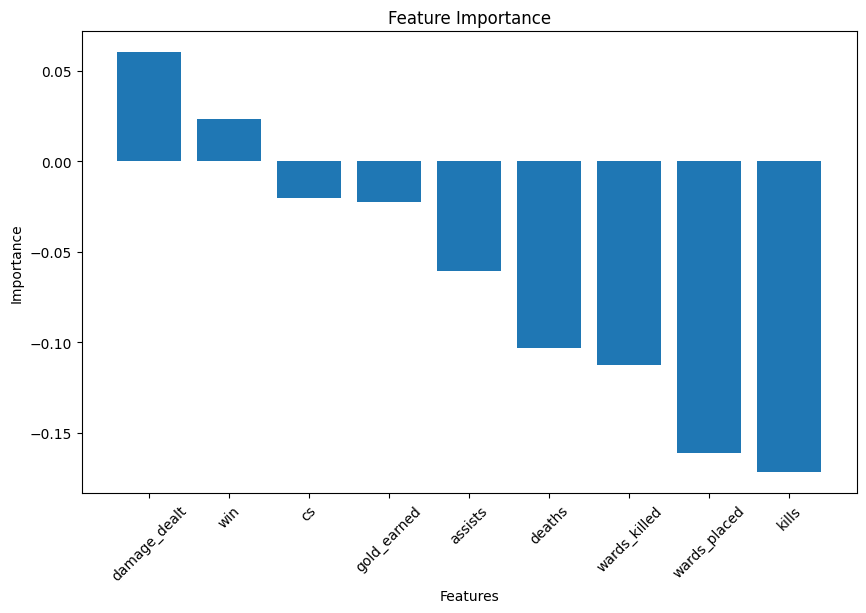

In [42]:
# Extract weight
X_train = pd.DataFrame(data)
input_dim = X_train.shape[1]
model = logistic_reg(input_dim)

weights = model.linear.weight.data.numpy().flatten()

features = X_train.columns
#Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()